In [2]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns

In [3]:
adata=sc.read_loom('Melms_norm.loom')

C:\Users\leona\anaconda3\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
adata.obs_names=adata.obs.obs_names
adata.var_names=adata.var.var_names

In [5]:
adata=adata[adata.obs.n_counts>1000].copy()
adata=adata[adata.obs.n_genes>1000].copy()

In [7]:
test_data=adata[ (adata.obs.cell_type_intermediate=='AT1') | (adata.obs.cell_type_intermediate=='AT2'),['XIST','TSIX','UTY','USP9Y','TTTY14',
                                                          'SLC17A7','DRD1','GAD2','GAD1',
                                                          'SGMS2','RFX2','FOSB','NR4A1','LMNA','KLF6',
                                                          'FDFT1','FASN','SCD','ABCA1','HSP90AA1','TNFSF10']].copy()

In [8]:
test_data=test_data[test_data.obs.n_counts<5000].copy()
#test_data=test_data[test_data.obs.n_genes>1000].copy()

In [14]:
test_data.var['highly_variable']=True

In [15]:
test_data.raw=test_data

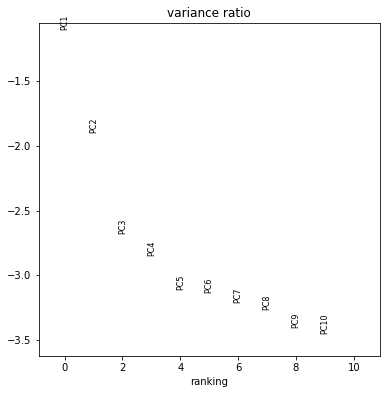

In [16]:
# Calculate the visualizations
plt.rcParams['figure.figsize']=(6,6) #rescale figures

n_pcs=10#test_data.n_vars-2
sc.pp.pca(test_data, n_comps=n_pcs, use_highly_variable=True, svd_solver='arpack',random_state=42)
sc.pl.pca_variance_ratio(test_data,n_pcs, log=True)

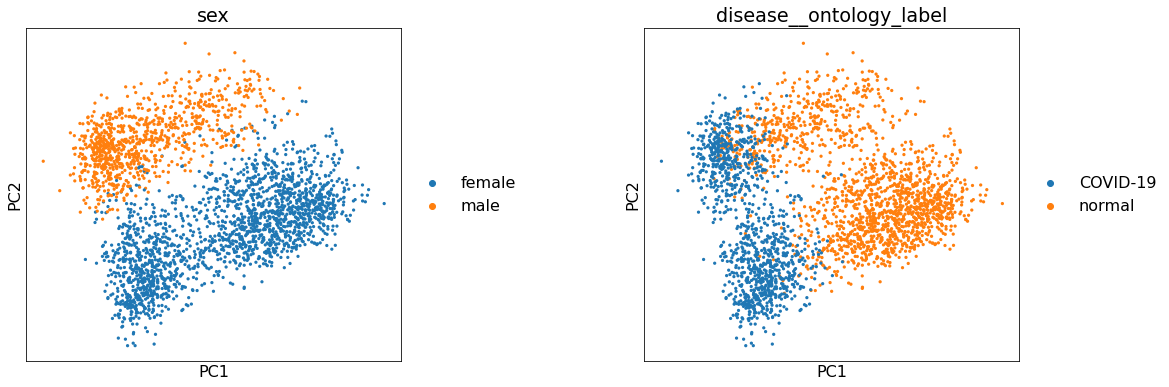

In [184]:
#sc.pl.pca_scatter(test_data, color=['sex','cell_type_main'],wspace=0.3)
sc.pl.pca_scatter(test_data, color=['sex','disease__ontology_label'],wspace=0.5)


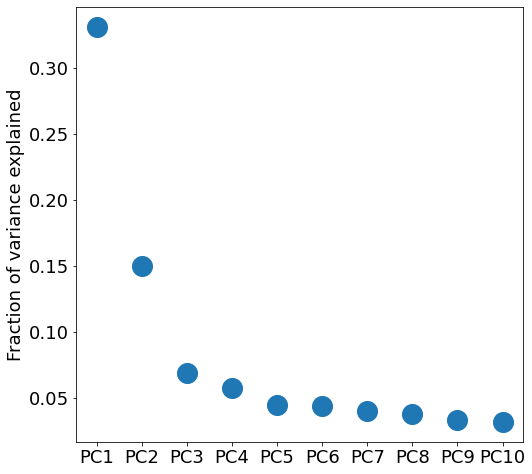

In [17]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
plt.rcParams.update({'font.size': 18})
plt.plot(test_data.uns['pca']['variance_ratio'],'o',markersize=20);
plt.ylabel('Fraction of variance explained')
plt.xticks(ticks=np.arange(10),labels=['PC'+i.astype(str) for i in np.arange(11)[1:]]);
#plt.xlabel('PC')


In [18]:
loadings=pd.DataFrame(test_data.varm['PCs'],columns=['PC'+i.astype(str) for i in np.arange(11)[1:]])
loadings['names']=test_data.var_names.values

loadings['type']=['X-linked gene','X-linked gene','Y-linked gene','Y-linked gene','Y-linked gene',
                  'Neuronal gene','Neuronal gene','Neuronal gene','Neuronal gene',
                  'COVID-triggered gene','COVID-triggered gene','COVID-triggered gene','COVID-triggered gene','COVID-triggered gene','COVID-triggered gene',
                  'COVID-repressed gene','COVID-repressed gene','COVID-repressed gene','COVID-repressed gene','COVID-repressed gene','COVID-repressed gene'
                  ]

loadings.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,names,type
0,0.239612,-0.545679,0.046443,-0.116131,0.004890,0.085037,0.060293,0.213487,0.435162,-0.055857,XIST,X-linked gene
1,0.210098,-0.517846,0.082460,-0.042170,-0.052736,0.131767,-0.165778,-0.358465,-0.535402,-0.250593,TSIX,X-linked gene
2,-0.144117,0.319349,-0.040336,0.070386,-0.048326,-0.011582,-0.081156,-0.013720,-0.149963,-0.154912,UTY,Y-linked gene


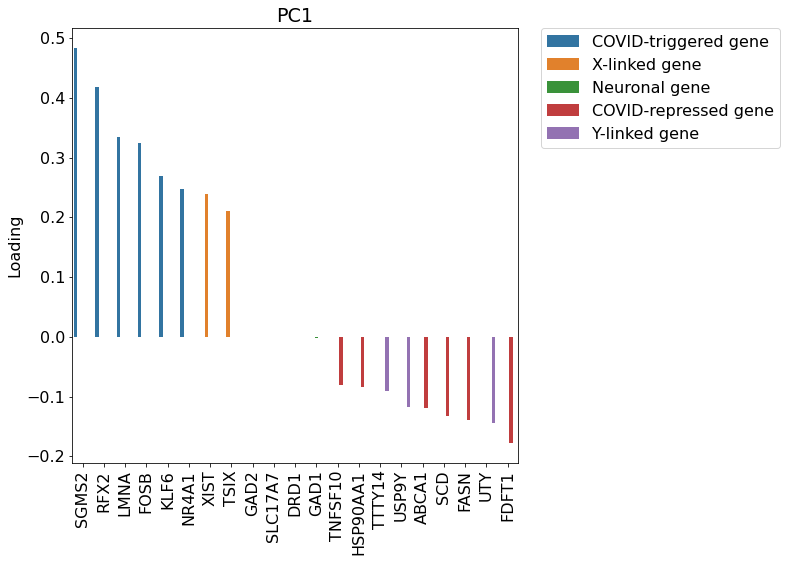

In [19]:
import seaborn as sns
loadings=loadings.sort_values('PC1',ascending=False)
plt.rcParams.update({'font.size': 16})

g=sns.barplot(data=loadings,y='PC1',x='names',hue='type')
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.title('PC1')
plt.ylabel('Loading')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

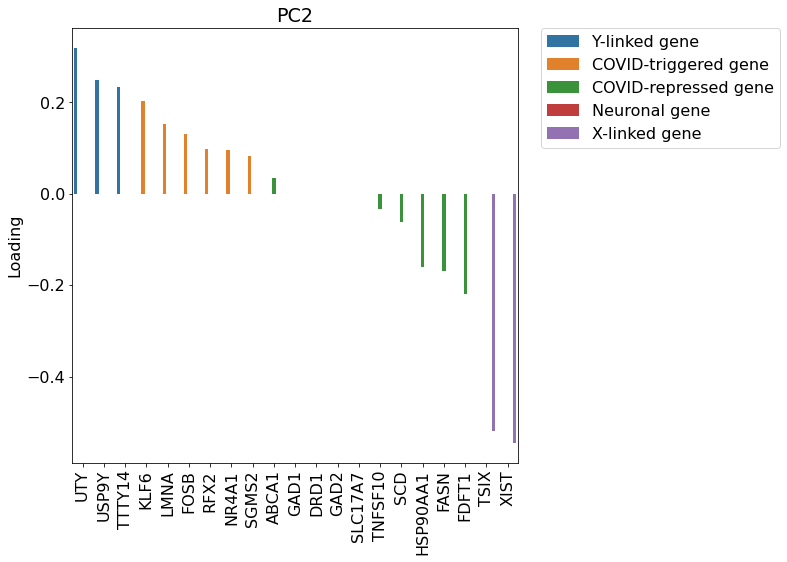

In [20]:
loadings=loadings.sort_values('PC2',ascending=False)
import seaborn as sns
g=sns.barplot(data=loadings,y='PC2',x='names',hue='type')
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.title('PC2')
plt.ylabel('Loading')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)